In [2]:
import csv

file_path = './陈雷/任务态/cl_Middle_MI_Round2_2.csv'

# 统计行数和最大列数
max_cols = 0
num_rows = 0

with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        num_rows += 1
        max_cols = max(max_cols, len(row))

print(f"行数: {num_rows}, 最大列数: {max_cols}")



行数: 154000, 最大列数: 34


In [1]:
import os
import csv

# 输入文件夹
input_folder = './陈雷/任务态'

# 遍历文件夹中的所有 CSV 文件
for file_name in os.listdir(input_folder):
    if file_name.endswith('.csv'):  # 仅处理 CSV 文件
        file_path = os.path.join(input_folder, file_name)

        # 读取原始 CSV 文件，处理去除空格的数据
        with open(file_path, 'r', encoding='utf-8') as f:
            reader = csv.reader(f)
            cleaned_data = []

            for row in reader:
                # 去除每个单元格的前后空格
                cleaned_row = [value.strip() if isinstance(value, str) else value for value in row]
                # 删除仅含空格的单元格
                cleaned_row = [value for value in cleaned_row if value.strip() != '']

                cleaned_data.append(cleaned_row)

        # 直接覆盖原文件
        with open(file_path, 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerows(cleaned_data)

        print(f"已清理并覆盖文件：{file_path}")

print("所有 CSV 文件处理完成！")



已清理并覆盖文件：./陈雷/任务态/cl_Middle_MI_Round1_2.csv
已清理并覆盖文件：./陈雷/任务态/cl_Middle_MI_Round2_2.csv
所有 CSV 文件处理完成！


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(file_path)
eeg_signal = df.iloc[500:, :-2]
print(eeg_signal.shape)

(153499, 32)


In [4]:
# 切片大小
window_size = 500
eeg_signal = eeg_signal.to_numpy()
# 计算可划分的完整切片数
num_windows = eeg_signal.shape[0] // window_size

# 将数据按时间维度切割
eeg_slices = eeg_signal[:num_windows * window_size].reshape(num_windows, window_size, -1)

print(f"原始数据形状: {eeg_signal.shape}")
print(f"切片后形状: {eeg_slices.shape}")  # (152, 1000, 32)

原始数据形状: (153499, 32)
切片后形状: (306, 500, 32)


/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


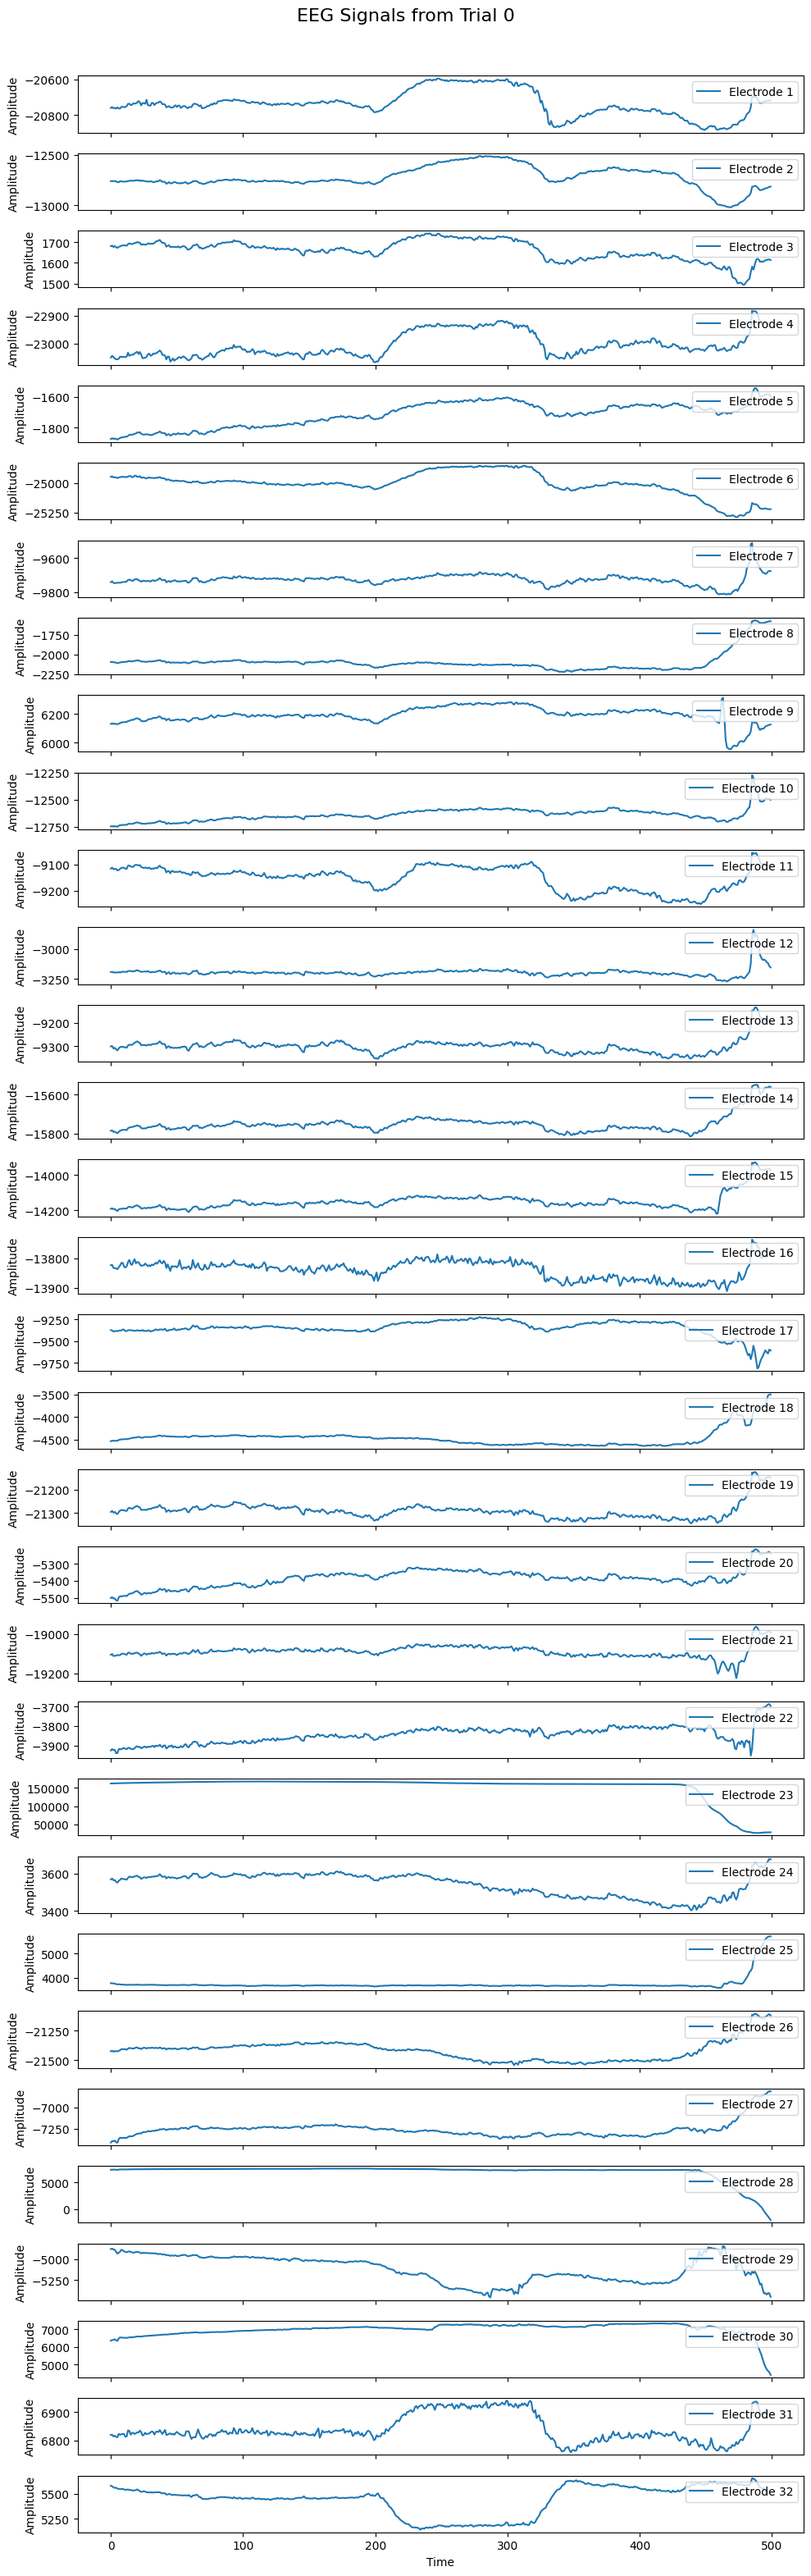

In [6]:
import numpy as np
import torch

# 确保 normalized_eeg 是 NumPy 数组
if isinstance(eeg_slices, torch.Tensor):
    eeg_slices = eeg_slices.cpu().numpy()

# 选择一个 trial（例如第一个 trial）
trial_idx = 0
eeg_trial = eeg_slices[trial_idx]  # 形状: (500, 32)

time = np.arange(eeg_trial.shape[0])  # 500 个时间点
num_channels = eeg_trial.shape[1]  # 32 个通道

# 创建子图
fig, axes = plt.subplots(num_channels, 1, figsize=(10, 1 * num_channels), sharex=True)

for i in range(num_channels):
    axes[i].plot(time, eeg_trial[:, i], label=f'Electrode {i+1}')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel('Time')  # 仅在最后一个子图设置 X 轴标签
fig.suptitle(f'EEG Signals from Trial {trial_idx}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # 调整布局
plt.show()

In [7]:
# import pandas as pd

# 读取 CSV 文件
# file_path = './韩光/任务态/hg_Middle_MI_Round2_2.csv'  # 替换为你的文件路径
# df_baseline = pd.read_csv(file_path)


# 假设电极信号是第一列到倒数第三列
baseline = df.iloc[:500, :-2]  # 第一列到倒数第三列（EEG 信号）
print(baseline.shape)

(500, 32)


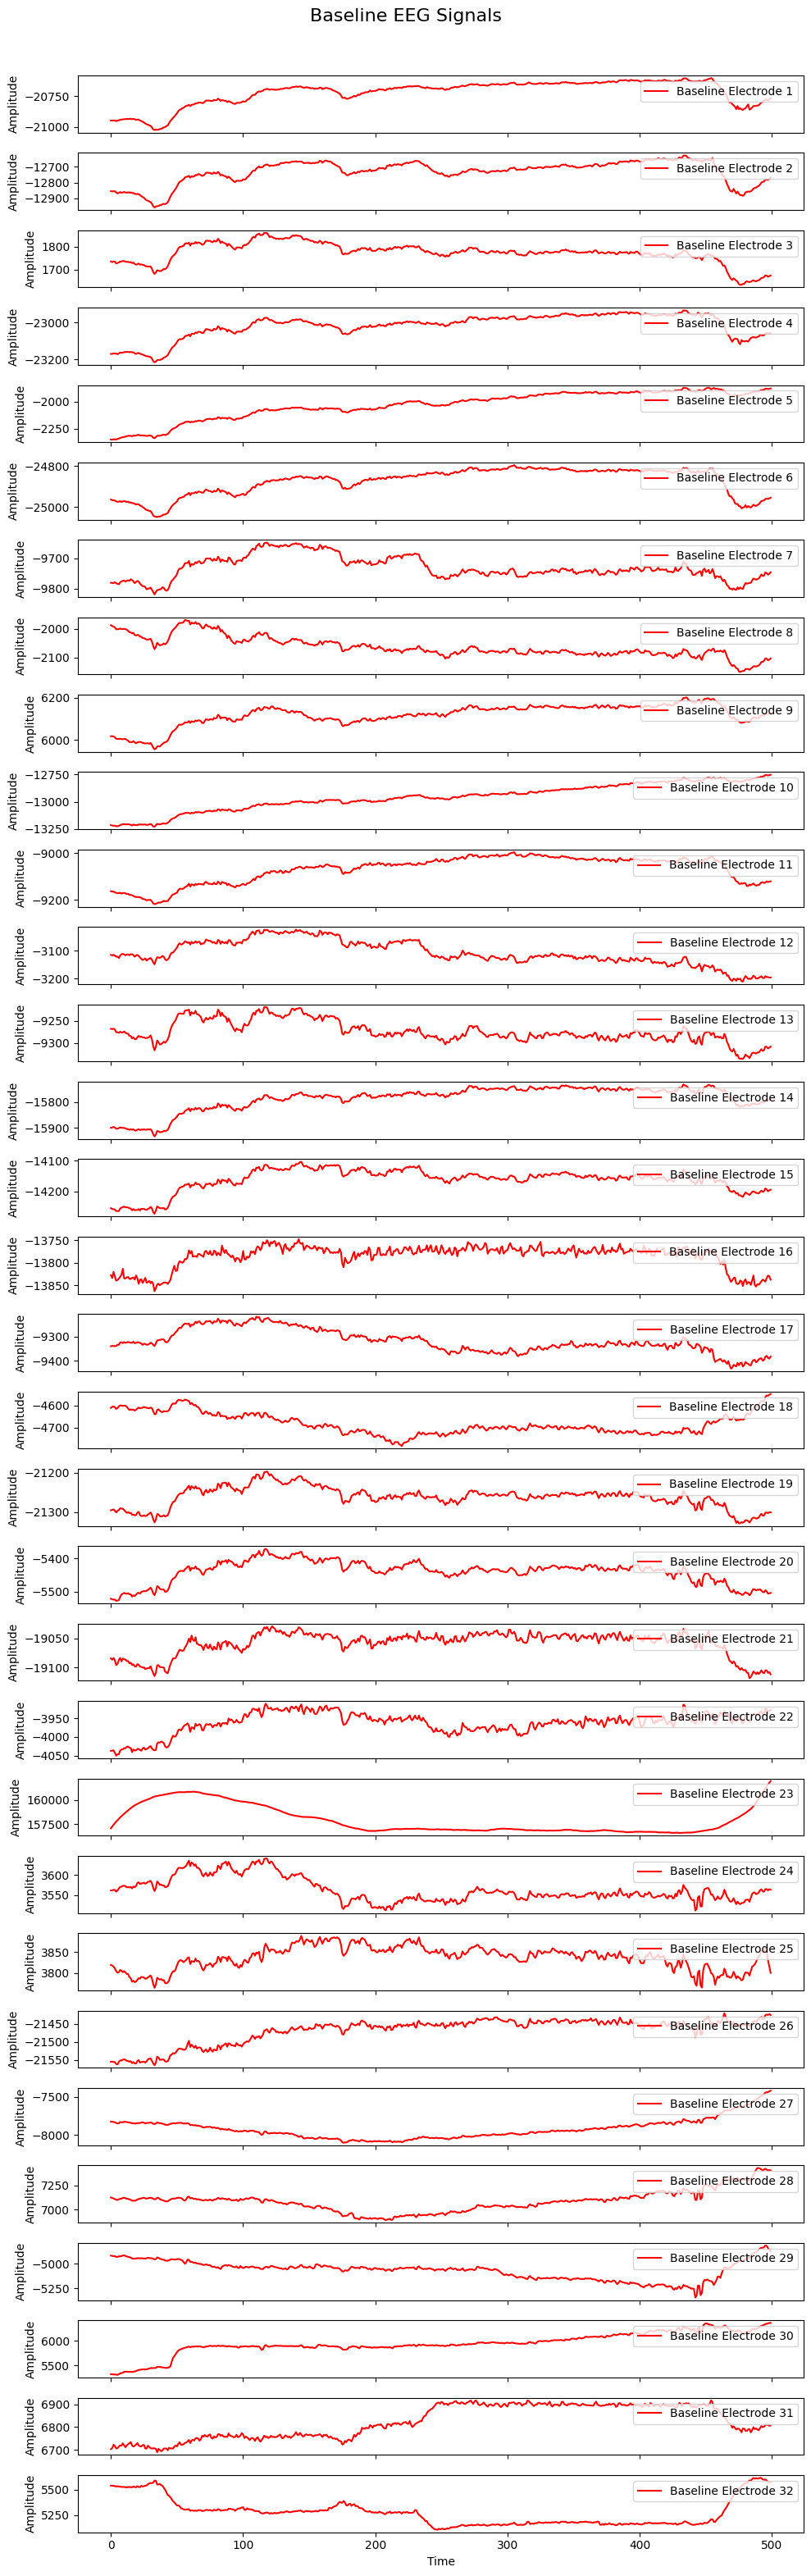

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 确保 baseline 是 NumPy 数组
if isinstance(baseline, pd.DataFrame):
    baseline = baseline.values  # 转换为 NumPy 数组
elif isinstance(baseline, torch.Tensor):
    baseline = baseline.cpu().numpy()  # 转换为 NumPy 数组


time = np.arange(baseline.shape[0])  # 500 个时间点
num_channels = baseline.shape[1]  # 32 个通道

# 创建子图
fig, axes = plt.subplots(num_channels, 1, figsize=(10, 1 * num_channels), sharex=True)

for i in range(num_channels):
    axes[i].plot(time, baseline[:, i], label=f'Baseline Electrode {i+1}', color='r')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel('Time')  # 仅在最后一个子图设置 X 轴标签
fig.suptitle('Baseline EEG Signals', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # 调整布局
plt.show()


In [10]:
# 假设 baseline 是 DataFrame，先转换为 Tensor
baseline = torch.tensor(baseline, dtype=torch.float32, device="cuda")
eeg_slices = torch.tensor(eeg_slices, dtype=torch.float32, device="cuda")

# 直接广播相减
normalized_eeg = eeg_slices - baseline.unsqueeze(0)  # 形状仍为 (305, 500, 32)
print(normalized_eeg.shape)

torch.Size([306, 500, 32])


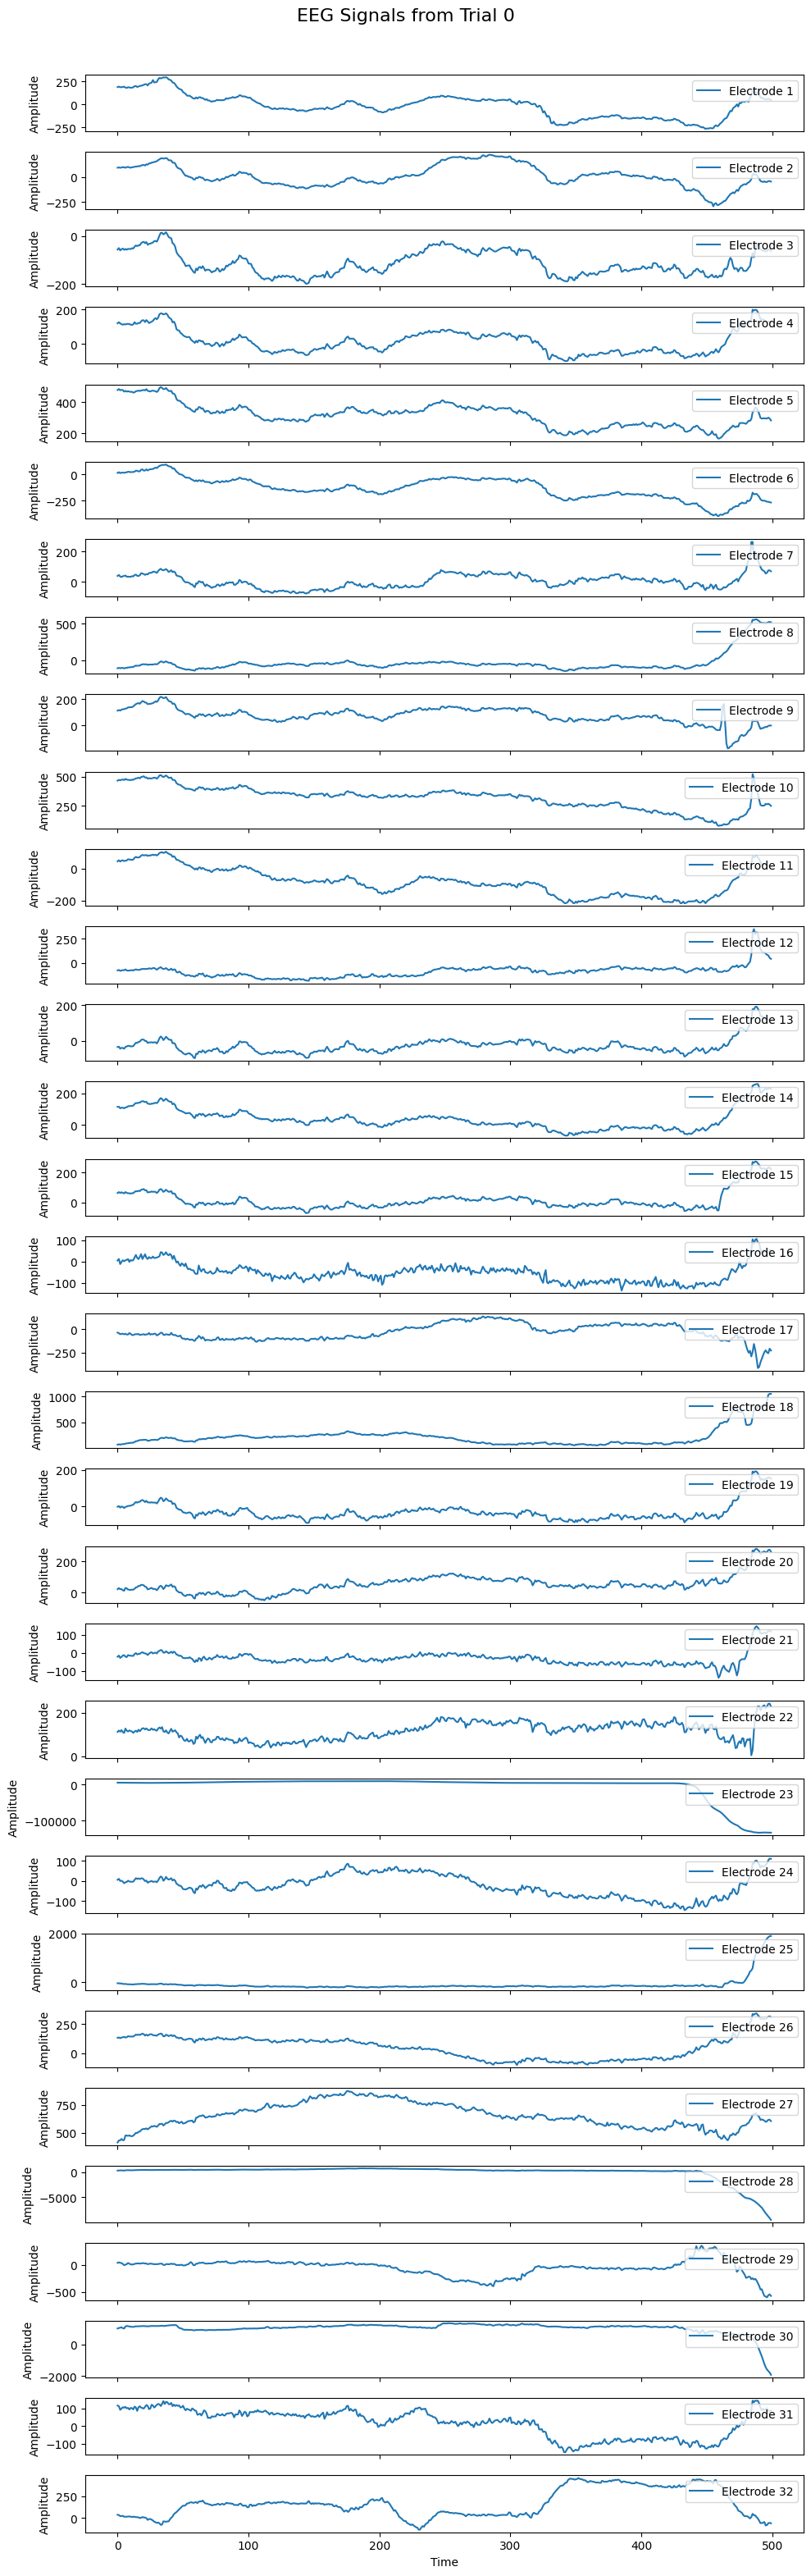

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 确保 normalized_eeg 是 NumPy 数组
if isinstance(normalized_eeg, torch.Tensor):
    normalized_eeg = normalized_eeg.cpu().numpy()

# 选择一个 trial（例如第一个 trial）
trial_idx = 0
eeg_trial = normalized_eeg[trial_idx]  # 形状: (500, 32)

time = np.arange(eeg_trial.shape[0])  # 500 个时间点
num_channels = eeg_trial.shape[1]  # 32 个通道

# 创建子图
fig, axes = plt.subplots(num_channels, 1, figsize=(10, 1 * num_channels), sharex=True)

for i in range(num_channels):
    axes[i].plot(time, eeg_trial[:, i], label=f'Electrode {i+1}')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel('Time')  # 仅在最后一个子图设置 X 轴标签
fig.suptitle(f'EEG Signals from Trial {trial_idx}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # 调整布局
plt.show()


In [23]:
import mne
# eeg_slices = eeg_slices.cpu().numpy() if eeg_slices.is_cuda else eeg_slices.numpy()
fs = 250  # 采样率
lowcut, highcut = 8, 40

# 使用 FIR 滤波器
eeg_slices = normalized_eeg.astype(np.float64)
eeg_slices_filtered = mne.filter.filter_data(eeg_slices, sfreq=fs, l_freq=lowcut, h_freq=highcut)


Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 s)



/tmp/ipykernel_19979/2161707076.py:8: RuntimeWarning: filter_length (413) is longer than the signal (32), distortion is likely. Reduce filter length or filter a longer signal.
  eeg_slices_filtered = mne.filter.filter_data(eeg_slices, sfreq=fs, l_freq=lowcut, h_freq=highcut)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elap

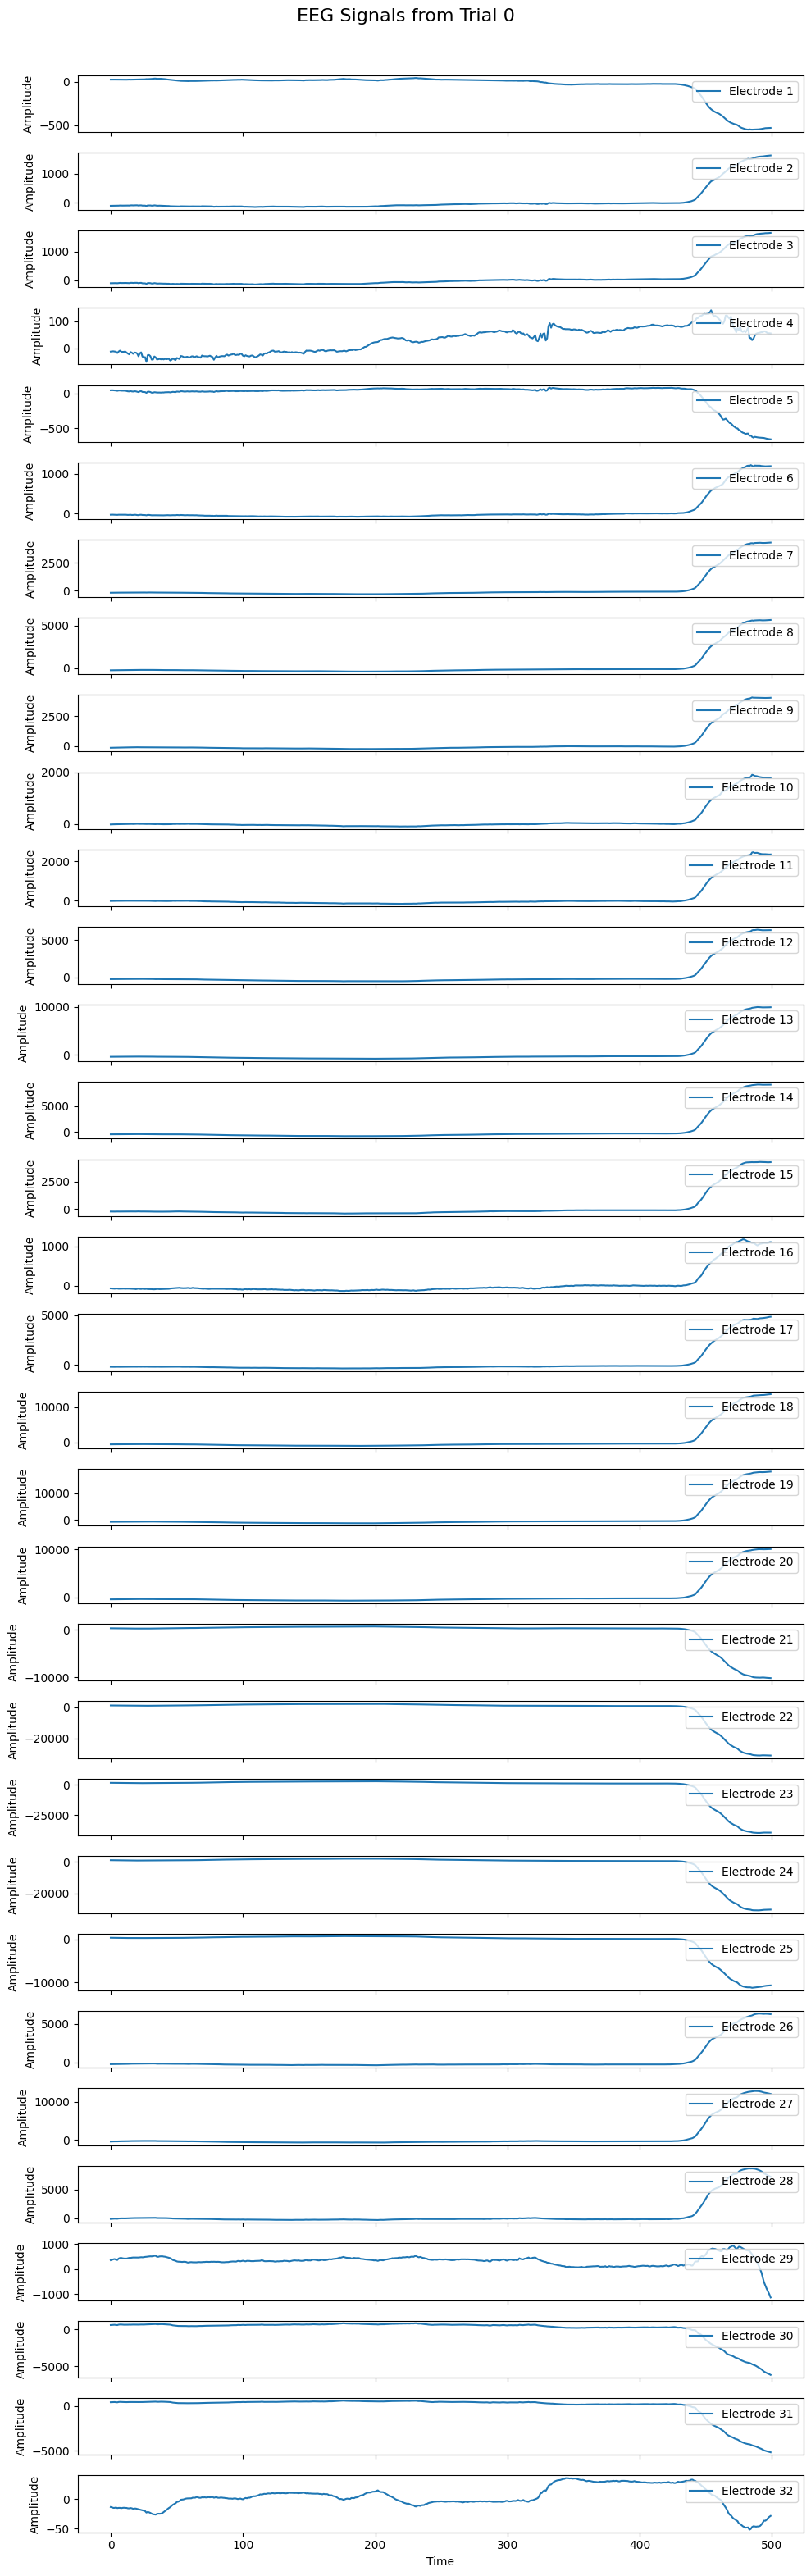

In [25]:

# 确保 normalized_eeg 是 NumPy 数组
if isinstance(eeg_slices_filtered, torch.Tensor):
    eeg_slices_filtered = normalized_eeg.cpu().numpy()

# 选择一个 trial（例如第一个 trial）
trial_idx = 0
eeg_trial = eeg_slices_filtered[trial_idx]  # 形状: (500, 32)

time = np.arange(eeg_trial.shape[0])  # 500 个时间点
num_channels = eeg_trial.shape[1]  # 32 个通道

# 创建子图
fig, axes = plt.subplots(num_channels, 1, figsize=(10, 1 * num_channels), sharex=True)

for i in range(num_channels):
    axes[i].plot(time, eeg_trial[:, i], label=f'Electrode {i+1}')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel('Time')  # 仅在最后一个子图设置 X 轴标签
fig.suptitle(f'EEG Signals from Trial {trial_idx}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # 调整布局
plt.show()


In [21]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


# 生成标签：所有数据点的标签均为 0
labels = np.full((eeg_slices_filtered.shape[0],), 2, dtype=np.int64)

# 自定义 PyTorch 数据集
class EEGDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)  # 转换为 PyTorch 张量
        self.labels = torch.tensor(labels, dtype=torch.long) # 转换为 PyTorch 张量
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# 创建数据集
dataset = EEGDataset(eeg_slices_filtered, labels)

# 创建 DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 测试一下
for batch_data, batch_labels in dataloader:
    print(f"数据批次形状: {batch_data.shape}, 标签形状: {batch_labels}")
    break  # 只打印一个 batch


数据批次形状: torch.Size([16, 500, 32]), 标签形状: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [22]:
import torch

# 转换为 PyTorch 张量
eeg_tensor = torch.tensor(eeg_slices_filtered, dtype=torch.float32)
label_tensor = torch.tensor(labels, dtype=torch.long)

# 保存为 .pt 文件
torch.save({'data': eeg_tensor, 'labels': label_tensor}, './ChenLei/cl_Middle_MI_Round2_2_dataset.pt')

print("数据集已保存为 `eeg_dataset.pt`")


数据集已保存为 `eeg_dataset.pt`


In [30]:
import torch

# 文件路径
file_paths = [
    "./ChenLei/cl_Middle_Close_2_dataset.pt",
    "./ChenLei/cl_Middle_MI_Round2_2_dataset.pt",
    "./ChenLei/cl_Middle_Open_2_dataset.pt"
]

# 用于存储所有数据
all_data = []
all_labels = []

# 逐个加载并合并
for file_path in file_paths:
    dataset = torch.load(file_path)
    eeg = dataset['data'].permute(0,2,1).unsqueeze(1)
    all_data.append(eeg)  # EEG 数据
    all_labels.append(dataset['labels'])  # 标签

# 拼接成一个大数据集
eeg_data = torch.cat(all_data, dim=0)  # 拼接 EEG 数据
eeg_labels = torch.cat(all_labels, dim=0)  # 拼接标签

print(f"最终数据形状: {eeg_data.shape}, 标签形状: {eeg_labels.shape}")


最终数据形状: torch.Size([1038, 1, 32, 500]), 标签形状: torch.Size([1038])


In [31]:
from torch.utils.data import TensorDataset, DataLoader

# 创建数据集
dataset = TensorDataset(eeg_data, eeg_labels)

# 创建 DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 训练时迭代数据
for batch in dataloader:
    x,y = batch
    print(x.shape,y)
    break  # 只打印一次 batch


torch.Size([16, 1, 32, 500]) tensor([1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1])


In [28]:
import torch
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import KFold
from classifier import ClassifierTrainer
from torcheeg.models import ATCNet


# ✅ 2. 交叉验证配置 (4 折)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# ✅ 3. 训练参数
HYPERPARAMETERS = {
    "batch_size": 16,
    "lr": 1e-4,
    "weight_decay": 1e-4,
    "num_epochs": 10,
}

training_metrics, test_metrics = [], []

# ✅ 4. 交叉验证训练
for fold, (train_idx, val_idx) in enumerate(k_fold.split(dataset)):
    print(f"\n🚀 训练第 {fold+1} 折...")

    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

    # 🎯 ATCNet 模型
    model = ATCNet(in_channels=1,
                    num_classes=3,
                    num_windows=3,
                    num_electrodes=32,
                    chunk_size=500)

    # 🎯 训练器
    trainer = ClassifierTrainer(
        model=model,
        num_classes=3,
        lr=HYPERPARAMETERS['lr'],
        weight_decay=HYPERPARAMETERS['weight_decay'],
        metrics=["accuracy"],
        accelerator="gpu"
    )

    # 🎯 训练模型
    trainer.fit(train_loader, val_loader, max_epochs=HYPERPARAMETERS['num_epochs'])

    # 🎯 计算训练 & 测试准确率
    training_result = trainer.test(train_loader)[0]
    test_result = trainer.test(val_loader)[0]

    # 🎯 记录结果
    training_metrics.append(training_result["test_accuracy"])
    test_metrics.append(test_result["test_accuracy"])

# ✅ 5. 输出最终结果
print("\n📊 训练准确率:", training_metrics)
print("📊 测试准确率:", test_metrics)
print("🔥 交叉验证平均测试准确率:", sum(test_metrics) / len(test_metrics))

/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/torch/nn/modules/conv.py:443: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/Convolution.cpp:744.)
  return F.conv2d(input, weight, bias, self.stride,
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ATCNet           | 67.2 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0 


🚀 训练第 1 折...
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('val_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('val_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
[2025-04-15 13:28:09] INFO (torcheeg/MainThread) 
[Val] val_loss: 1.431 val_accuracy: 0.000 



/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 72.21it/s, loss=0.894, train_loss=0.818, train_accuracy=0.767]

[2025-04-15 13:28:10] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.885 val_accuracy: 0.615 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 71.47it/s, loss=0.894, train_loss=0.818, train_accuracy=0.767]

/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
[2025-04-15 13:28:10] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.924 train_accuracy: 0.677 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 75.44it/s, loss=0.76, train_loss=0.710, train_accuracy=0.967] 

[2025-04-15 13:28:10] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.760 val_accuracy: 0.894 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 74.59it/s, loss=0.76, train_loss=0.710, train_accuracy=0.967]

[2025-04-15 13:28:10] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.772 train_accuracy: 0.887 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 76.96it/s, loss=0.685, train_loss=0.665, train_accuracy=0.967]

[2025-04-15 13:28:11] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.642 val_accuracy: 0.966 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 76.16it/s, loss=0.685, train_loss=0.665, train_accuracy=0.967]

[2025-04-15 13:28:11] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.694 train_accuracy: 0.952 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 76.11it/s, loss=0.632, train_loss=0.613, train_accuracy=1.000]

[2025-04-15 13:28:11] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.600 val_accuracy: 0.990 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 75.32it/s, loss=0.632, train_loss=0.613, train_accuracy=1.000]

[2025-04-15 13:28:11] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.638 train_accuracy: 0.983 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 75.17it/s, loss=0.613, train_loss=0.593, train_accuracy=0.967]

[2025-04-15 13:28:12] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.585 val_accuracy: 1.000 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 74.44it/s, loss=0.613, train_loss=0.593, train_accuracy=0.967]

[2025-04-15 13:28:12] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.615 train_accuracy: 0.986 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 77.51it/s, loss=0.599, train_loss=0.574, train_accuracy=1.000]

[2025-04-15 13:28:12] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.579 val_accuracy: 1.000 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 76.70it/s, loss=0.599, train_loss=0.574, train_accuracy=1.000]

[2025-04-15 13:28:12] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.602 train_accuracy: 0.987 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 76.24it/s, loss=0.593, train_loss=0.588, train_accuracy=1.000]

[2025-04-15 13:28:13] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.574 val_accuracy: 1.000 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 75.49it/s, loss=0.593, train_loss=0.588, train_accuracy=1.000]

[2025-04-15 13:28:13] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.593 train_accuracy: 0.990 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 77.16it/s, loss=0.586, train_loss=0.594, train_accuracy=1.000]

[2025-04-15 13:28:13] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.572 val_accuracy: 1.000 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 76.32it/s, loss=0.586, train_loss=0.594, train_accuracy=1.000]

[2025-04-15 13:28:13] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.587 train_accuracy: 0.990 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 76.46it/s, loss=0.584, train_loss=0.573, train_accuracy=1.000]

[2025-04-15 13:28:13] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.570 val_accuracy: 1.000 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 75.68it/s, loss=0.584, train_loss=0.573, train_accuracy=1.000]

[2025-04-15 13:28:13] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.583 train_accuracy: 0.992 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 76.30it/s, loss=0.583, train_loss=0.565, train_accuracy=1.000]

[2025-04-15 13:28:14] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.569 val_accuracy: 1.000 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 75.52it/s, loss=0.583, train_loss=0.565, train_accuracy=1.000]

[2025-04-15 13:28:14] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.583 train_accuracy: 0.989 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 75.04it/s, loss=0.583, train_loss=0.565, train_accuracy=1.000]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 209.67it/s]

/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
/root/autodl-tmp/conda/envs/law/lib/python3.8/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('test_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
[2025-04-15 13:28:14] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.567 test_accuracy: 0.996 



Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 202.85it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9963855147361755
        test_loss           0.5670153498649597
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 210.70it/s]

[2025-04-15 13:28:14] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.569 test_accuracy: 1.000 



Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 189.27it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy                 1.0
        test_loss            0.568766176700592
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🚀 训练第 2 折...


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ATCNet           | 67.2 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
67.2 K    Trainable params
0         Non-trainable params
67.2 K    Total params
0.269     Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 174.29it/s]

[2025-04-15 13:28:14] INFO (torcheeg/MainThread) 
[Val] val_loss: 1.034 val_accuracy: 0.469 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 72.55it/s, loss=0.878, train_loss=0.787, train_accuracy=0.967]

[2025-04-15 13:28:15] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.876 val_accuracy: 0.952 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 71.87it/s, loss=0.878, train_loss=0.787, train_accuracy=0.967]

[2025-04-15 13:28:15] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.920 train_accuracy: 0.813 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 76.68it/s, loss=0.727, train_loss=0.688, train_accuracy=1.000]

[2025-04-15 13:28:15] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.710 val_accuracy: 0.986 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 75.93it/s, loss=0.727, train_loss=0.688, train_accuracy=1.000]

[2025-04-15 13:28:15] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.739 train_accuracy: 0.970 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 76.72it/s, loss=0.677, train_loss=0.668, train_accuracy=0.967]

[2025-04-15 13:28:16] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.623 val_accuracy: 0.990 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 75.97it/s, loss=0.677, train_loss=0.668, train_accuracy=0.967]

[2025-04-15 13:28:16] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.680 train_accuracy: 0.976 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 76.69it/s, loss=0.647, train_loss=0.614, train_accuracy=1.000]

[2025-04-15 13:28:16] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.599 val_accuracy: 0.990 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 75.91it/s, loss=0.647, train_loss=0.614, train_accuracy=1.000]

[2025-04-15 13:28:16] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.648 train_accuracy: 0.983 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 76.89it/s, loss=0.629, train_loss=0.641, train_accuracy=0.933]

[2025-04-15 13:28:16] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.588 val_accuracy: 0.995 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 76.12it/s, loss=0.629, train_loss=0.641, train_accuracy=0.933]

[2025-04-15 13:28:16] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.629 train_accuracy: 0.988 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 76.42it/s, loss=0.611, train_loss=0.607, train_accuracy=1.000]

[2025-04-15 13:28:17] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.586 val_accuracy: 0.995 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 75.64it/s, loss=0.611, train_loss=0.607, train_accuracy=1.000]

[2025-04-15 13:28:17] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.615 train_accuracy: 0.992 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 76.10it/s, loss=0.61, train_loss=0.591, train_accuracy=1.000] 

[2025-04-15 13:28:17] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.578 val_accuracy: 1.000 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 75.37it/s, loss=0.61, train_loss=0.591, train_accuracy=1.000]

[2025-04-15 13:28:17] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.609 train_accuracy: 0.988 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 77.38it/s, loss=0.598, train_loss=0.602, train_accuracy=0.967]

[2025-04-15 13:28:18] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.576 val_accuracy: 0.995 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 76.59it/s, loss=0.598, train_loss=0.602, train_accuracy=0.967]

[2025-04-15 13:28:18] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.599 train_accuracy: 0.992 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 76.93it/s, loss=0.593, train_loss=0.592, train_accuracy=1.000]

[2025-04-15 13:28:18] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.573 val_accuracy: 0.995 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 76.14it/s, loss=0.593, train_loss=0.592, train_accuracy=1.000]

[2025-04-15 13:28:18] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.595 train_accuracy: 0.989 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 76.70it/s, loss=0.589, train_loss=0.601, train_accuracy=0.967]

[2025-04-15 13:28:19] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.569 val_accuracy: 1.000 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 75.92it/s, loss=0.589, train_loss=0.601, train_accuracy=0.967]

[2025-04-15 13:28:19] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.589 train_accuracy: 0.990 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 75.50it/s, loss=0.589, train_loss=0.601, train_accuracy=0.967]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 208.16it/s]

[2025-04-15 13:28:19] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.570 test_accuracy: 1.000 



Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 200.49it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy                 1.0
        test_loss           0.5699225664138794
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 205.58it/s]

[2025-04-15 13:28:19] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.569 test_accuracy: 1.000 



Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 184.47it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy                 1.0
        test_loss           0.5688948631286621
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🚀 训练第 3 折...


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ATCNet           | 67.2 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
67.2 K    Trainable params
0         Non-trainable params
67.2 K    Total params
0.269     Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 200.61it/s]

[2025-04-15 13:28:19] INFO (torcheeg/MainThread) 
[Val] val_loss: 1.034 val_accuracy: 0.375 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 73.06it/s, loss=0.904, train_loss=0.895, train_accuracy=0.633]

[2025-04-15 13:28:19] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.863 val_accuracy: 0.635 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 72.36it/s, loss=0.904, train_loss=0.895, train_accuracy=0.633]

[2025-04-15 13:28:19] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.942 train_accuracy: 0.646 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 75.89it/s, loss=0.803, train_loss=0.752, train_accuracy=0.933]

[2025-04-15 13:28:20] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.761 val_accuracy: 0.986 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 75.15it/s, loss=0.803, train_loss=0.752, train_accuracy=0.933]

[2025-04-15 13:28:20] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.813 train_accuracy: 0.877 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 75.60it/s, loss=0.705, train_loss=0.685, train_accuracy=0.933]

[2025-04-15 13:28:20] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.654 val_accuracy: 0.986 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 74.84it/s, loss=0.705, train_loss=0.685, train_accuracy=0.933]

[2025-04-15 13:28:20] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.714 train_accuracy: 0.960 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 75.50it/s, loss=0.654, train_loss=0.670, train_accuracy=1.000]

[2025-04-15 13:28:21] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.611 val_accuracy: 0.986 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 74.77it/s, loss=0.654, train_loss=0.670, train_accuracy=1.000]

[2025-04-15 13:28:21] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.661 train_accuracy: 0.977 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 75.77it/s, loss=0.629, train_loss=0.599, train_accuracy=1.000]

[2025-04-15 13:28:21] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.593 val_accuracy: 0.986 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 75.02it/s, loss=0.629, train_loss=0.599, train_accuracy=1.000]

[2025-04-15 13:28:21] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.633 train_accuracy: 0.981 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 74.87it/s, loss=0.616, train_loss=0.626, train_accuracy=0.967]

[2025-04-15 13:28:22] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.586 val_accuracy: 0.990 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 74.13it/s, loss=0.616, train_loss=0.626, train_accuracy=0.967]

[2025-04-15 13:28:22] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.618 train_accuracy: 0.983 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 75.87it/s, loss=0.606, train_loss=0.599, train_accuracy=1.000]

[2025-04-15 13:28:22] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.580 val_accuracy: 0.990 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 75.13it/s, loss=0.606, train_loss=0.599, train_accuracy=1.000]

[2025-04-15 13:28:22] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.607 train_accuracy: 0.982 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 75.21it/s, loss=0.6, train_loss=0.624, train_accuracy=0.933]  

[2025-04-15 13:28:23] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.576 val_accuracy: 0.990 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 74.43it/s, loss=0.6, train_loss=0.624, train_accuracy=0.933]

[2025-04-15 13:28:23] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.600 train_accuracy: 0.982 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 75.20it/s, loss=0.594, train_loss=0.639, train_accuracy=0.900]

[2025-04-15 13:28:23] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.573 val_accuracy: 0.995 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 74.42it/s, loss=0.594, train_loss=0.639, train_accuracy=0.900]

[2025-04-15 13:28:23] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.594 train_accuracy: 0.983 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 74.50it/s, loss=0.587, train_loss=0.618, train_accuracy=0.933]

[2025-04-15 13:28:23] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.570 val_accuracy: 0.995 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 73.73it/s, loss=0.587, train_loss=0.618, train_accuracy=0.933]

[2025-04-15 13:28:23] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.589 train_accuracy: 0.986 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 73.32it/s, loss=0.587, train_loss=0.618, train_accuracy=0.933]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 205.02it/s]

[2025-04-15 13:28:24] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.574 test_accuracy: 0.988 



Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 198.62it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9879518151283264
        test_loss           0.5742279291152954
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 197.05it/s]

[2025-04-15 13:28:24] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.570 test_accuracy: 0.995 



Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 176.63it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.995192289352417
        test_loss           0.5704653263092041
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🚀 训练第 4 折...


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ATCNet           | 67.2 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
67.2 K    Trainable params
0         Non-trainable params
67.2 K    Total params
0.269     Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 190.41it/s]

[2025-04-15 13:28:24] INFO (torcheeg/MainThread) 
[Val] val_loss: 1.551 val_accuracy: 0.000 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 72.34it/s, loss=0.887, train_loss=0.834, train_accuracy=0.903]

[2025-04-15 13:28:24] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.878 val_accuracy: 0.966 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 71.63it/s, loss=0.887, train_loss=0.834, train_accuracy=0.903]

[2025-04-15 13:28:24] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.915 train_accuracy: 0.755 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 70.67it/s, loss=0.749, train_loss=0.730, train_accuracy=0.903]

[2025-04-15 13:28:25] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.715 val_accuracy: 0.942 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 69.82it/s, loss=0.749, train_loss=0.730, train_accuracy=0.903]

[2025-04-15 13:28:25] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.760 train_accuracy: 0.947 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 68.60it/s, loss=0.678, train_loss=0.647, train_accuracy=1.000]

[2025-04-15 13:28:25] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.636 val_accuracy: 0.966 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 67.79it/s, loss=0.678, train_loss=0.647, train_accuracy=1.000]

[2025-04-15 13:28:25] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.684 train_accuracy: 0.969 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 71.82it/s, loss=0.643, train_loss=0.638, train_accuracy=0.968]

[2025-04-15 13:28:26] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.617 val_accuracy: 0.966 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 71.13it/s, loss=0.643, train_loss=0.638, train_accuracy=0.968]

[2025-04-15 13:28:26] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.647 train_accuracy: 0.980 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 73.64it/s, loss=0.62, train_loss=0.642, train_accuracy=0.968] 

[2025-04-15 13:28:26] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.597 val_accuracy: 0.981 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 72.75it/s, loss=0.62, train_loss=0.642, train_accuracy=0.968]

[2025-04-15 13:28:26] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.625 train_accuracy: 0.980 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 71.10it/s, loss=0.615, train_loss=0.601, train_accuracy=1.000]

[2025-04-15 13:28:27] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.587 val_accuracy: 0.981 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 70.27it/s, loss=0.615, train_loss=0.601, train_accuracy=1.000]

[2025-04-15 13:28:27] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.614 train_accuracy: 0.976 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 69.83it/s, loss=0.598, train_loss=0.623, train_accuracy=0.935]

[2025-04-15 13:28:27] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.583 val_accuracy: 0.981 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 69.01it/s, loss=0.598, train_loss=0.623, train_accuracy=0.935]

[2025-04-15 13:28:27] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.599 train_accuracy: 0.987 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 72.77it/s, loss=0.591, train_loss=0.597, train_accuracy=0.968]

[2025-04-15 13:28:28] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.580 val_accuracy: 0.981 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 71.84it/s, loss=0.591, train_loss=0.597, train_accuracy=0.968]

[2025-04-15 13:28:28] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.592 train_accuracy: 0.994 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 72.42it/s, loss=0.588, train_loss=0.605, train_accuracy=0.968]

[2025-04-15 13:28:28] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.574 val_accuracy: 0.986 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 71.42it/s, loss=0.588, train_loss=0.605, train_accuracy=0.968]

[2025-04-15 13:28:28] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.588 train_accuracy: 0.988 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 72.50it/s, loss=0.582, train_loss=0.585, train_accuracy=1.000]

[2025-04-15 13:28:28] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.571 val_accuracy: 0.986 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 71.66it/s, loss=0.582, train_loss=0.585, train_accuracy=1.000]

[2025-04-15 13:28:28] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.581 train_accuracy: 0.993 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 71.18it/s, loss=0.582, train_loss=0.585, train_accuracy=1.000]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 202.27it/s]

[2025-04-15 13:28:29] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.570 test_accuracy: 0.995 



Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 195.44it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9951865077018738
        test_loss           0.5697267651557922
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 201.94it/s]

[2025-04-15 13:28:29] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.571 test_accuracy: 0.986 



Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 180.72it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9855072498321533
        test_loss           0.5706971883773804
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🚀 训练第 5 折...


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ATCNet           | 67.2 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
67.2 K    Trainable params
0         Non-trainable params
67.2 K    Total params
0.269     Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 171.85it/s]

[2025-04-15 13:28:29] INFO (torcheeg/MainThread) 
[Val] val_loss: 1.540 val_accuracy: 0.000 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 70.43it/s, loss=0.89, train_loss=0.851, train_accuracy=0.839] 

[2025-04-15 13:28:29] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.898 val_accuracy: 0.932 



Epoch 0: 100%|██████████| 33/33 [00:00<00:00, 69.78it/s, loss=0.89, train_loss=0.851, train_accuracy=0.839]

[2025-04-15 13:28:29] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.920 train_accuracy: 0.793 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 75.87it/s, loss=0.755, train_loss=0.723, train_accuracy=0.935]

[2025-04-15 13:28:30] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.736 val_accuracy: 0.957 



Epoch 1: 100%|██████████| 33/33 [00:00<00:00, 75.07it/s, loss=0.755, train_loss=0.723, train_accuracy=0.935]

[2025-04-15 13:28:30] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.765 train_accuracy: 0.936 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 76.79it/s, loss=0.683, train_loss=0.681, train_accuracy=0.935]

[2025-04-15 13:28:30] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.646 val_accuracy: 0.976 



Epoch 2: 100%|██████████| 33/33 [00:00<00:00, 76.04it/s, loss=0.683, train_loss=0.681, train_accuracy=0.935]

[2025-04-15 13:28:30] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.688 train_accuracy: 0.957 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 77.35it/s, loss=0.642, train_loss=0.621, train_accuracy=1.000]

[2025-04-15 13:28:31] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.611 val_accuracy: 0.981 



Epoch 3: 100%|██████████| 33/33 [00:00<00:00, 76.56it/s, loss=0.642, train_loss=0.621, train_accuracy=1.000]

[2025-04-15 13:28:31] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.647 train_accuracy: 0.968 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 77.38it/s, loss=0.619, train_loss=0.608, train_accuracy=1.000]

[2025-04-15 13:28:31] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.594 val_accuracy: 0.995 



Epoch 4: 100%|██████████| 33/33 [00:00<00:00, 76.60it/s, loss=0.619, train_loss=0.608, train_accuracy=1.000]

[2025-04-15 13:28:31] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.625 train_accuracy: 0.980 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 76.31it/s, loss=0.607, train_loss=0.605, train_accuracy=0.968]

[2025-04-15 13:28:31] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.585 val_accuracy: 0.995 



Epoch 5: 100%|██████████| 33/33 [00:00<00:00, 75.54it/s, loss=0.607, train_loss=0.605, train_accuracy=0.968]

[2025-04-15 13:28:31] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.610 train_accuracy: 0.984 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 77.18it/s, loss=0.599, train_loss=0.584, train_accuracy=1.000]

[2025-04-15 13:28:32] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.577 val_accuracy: 1.000 



Epoch 6: 100%|██████████| 33/33 [00:00<00:00, 76.39it/s, loss=0.599, train_loss=0.584, train_accuracy=1.000]

[2025-04-15 13:28:32] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.600 train_accuracy: 0.984 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 77.25it/s, loss=0.595, train_loss=0.575, train_accuracy=1.000]

[2025-04-15 13:28:32] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.574 val_accuracy: 1.000 



Epoch 7: 100%|██████████| 33/33 [00:00<00:00, 76.46it/s, loss=0.595, train_loss=0.575, train_accuracy=1.000]

[2025-04-15 13:28:32] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.595 train_accuracy: 0.984 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 77.28it/s, loss=0.586, train_loss=0.574, train_accuracy=1.000]

[2025-04-15 13:28:33] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.571 val_accuracy: 1.000 



Epoch 8: 100%|██████████| 33/33 [00:00<00:00, 76.48it/s, loss=0.586, train_loss=0.574, train_accuracy=1.000]

[2025-04-15 13:28:33] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.586 train_accuracy: 0.993 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 77.37it/s, loss=0.586, train_loss=0.592, train_accuracy=0.968]

[2025-04-15 13:28:33] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.571 val_accuracy: 1.000 



Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 76.60it/s, loss=0.586, train_loss=0.592, train_accuracy=0.968]

[2025-04-15 13:28:33] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.587 train_accuracy: 0.988 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 33/33 [00:00<00:00, 76.14it/s, loss=0.586, train_loss=0.592, train_accuracy=0.968]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 205.95it/s]

[2025-04-15 13:28:33] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.571 test_accuracy: 0.999 



Testing DataLoader 0: 100%|██████████| 26/26 [00:00<00:00, 197.75it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9987966418266296
        test_loss           0.5714804530143738
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 196.62it/s]

[2025-04-15 13:28:33] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.571 test_accuracy: 1.000 



Testing DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 177.59it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy                 1.0
        test_loss           0.5710322260856628
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

📊 训练准确率: [0.9963855147361755, 1.0, 0.9879518151283264, 0.9951865077018738, 0.9987966418266296]
📊 测试准确率: [1.0, 1.0, 0.995192289352417, 0.9855072498321533, 1.0]
🔥 交叉验证平均测试准确率: 0.9961399078369141


In [29]:
import torch
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import train_test_split
from classifier import ClassifierTrainer
from torcheeg.models import ATCNet

# ✅ 训练参数
HYPERPARAMETERS = {
    "batch_size": 16,
    "lr": 1e-4,
    "weight_decay": 1e-4,
    "num_epochs": 20,
}

# ✅ 划分训练集和测试集
train_idx, val_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)

train_subset = Subset(dataset, train_idx)
val_subset = Subset(dataset, val_idx)

train_loader = DataLoader(train_subset, batch_size=HYPERPARAMETERS["batch_size"], shuffle=True)
val_loader = DataLoader(val_subset, batch_size=HYPERPARAMETERS["batch_size"], shuffle=False)

# 🎯 ATCNet 模型
model = ATCNet(in_channels=1,
               num_classes=3,
               num_windows=3,
               num_electrodes=32,
               chunk_size=500)

# 🎯 训练器
trainer = ClassifierTrainer(
    model=model,
    num_classes=3,
    lr=HYPERPARAMETERS['lr'],
    weight_decay=HYPERPARAMETERS['weight_decay'],
    metrics=["accuracy"],
    accelerator="gpu"
)

# 🎯 训练模型
trainer.fit(train_loader, val_loader, max_epochs=HYPERPARAMETERS['num_epochs'])

# 🎯 计算训练 & 测试准确率
training_result = trainer.test(train_loader)[0]
test_result = trainer.test(val_loader)[0]

# ✅ 输出最终结果
print("\n📊 训练准确率:", training_result["test_accuracy"])
print("📊 测试准确率:", test_result["test_accuracy"])


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | ATCNet           | 67.2 K
1 | ce_fn         | CrossEntropyLoss | 0     
2 | train_loss    | MeanMetric       | 0     
3 | val_loss      | MeanMetric       | 0     
4 | test_loss     | MeanMetric       | 0     
5 | train_metrics | MetricCollection | 0     
6 | val_metrics   | MetricCollection | 0     
7 | test_metrics  | MetricCollection | 0     
---------------------------------------------------
67.2 K    Trainable params
0         Non-trainable params
67.2 K    Total params
0.269     Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 183.86it/s]

[2025-04-15 13:29:20] INFO (torcheeg/MainThread) 
[Val] val_loss: 1.195 val_accuracy: 0.344 



Epoch 0: 100%|██████████| 65/65 [00:00<00:00, 75.14it/s, loss=0.76, train_loss=0.737, train_accuracy=0.857] 

[2025-04-15 13:29:21] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.765 val_accuracy: 0.990 



Epoch 0: 100%|██████████| 65/65 [00:00<00:00, 74.76it/s, loss=0.76, train_loss=0.737, train_accuracy=0.857]

[2025-04-15 13:29:21] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.856 train_accuracy: 0.789 



Epoch 1: 100%|██████████| 65/65 [00:00<00:00, 75.75it/s, loss=0.628, train_loss=0.611, train_accuracy=1.000]

[2025-04-15 13:29:22] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.601 val_accuracy: 0.990 



Epoch 1: 100%|██████████| 65/65 [00:00<00:00, 75.36it/s, loss=0.628, train_loss=0.611, train_accuracy=1.000]

[2025-04-15 13:29:22] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.656 train_accuracy: 0.972 



Epoch 2: 100%|██████████| 65/65 [00:00<00:00, 74.01it/s, loss=0.603, train_loss=0.577, train_accuracy=1.000]

[2025-04-15 13:29:23] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.584 val_accuracy: 0.990 



Epoch 2: 100%|██████████| 65/65 [00:00<00:00, 73.64it/s, loss=0.603, train_loss=0.577, train_accuracy=1.000]

[2025-04-15 13:29:23] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.607 train_accuracy: 0.980 



Epoch 3: 100%|██████████| 65/65 [00:00<00:00, 76.77it/s, loss=0.598, train_loss=0.652, train_accuracy=0.929]

[2025-04-15 13:29:24] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.574 val_accuracy: 0.990 



Epoch 3: 100%|██████████| 65/65 [00:00<00:00, 76.36it/s, loss=0.598, train_loss=0.652, train_accuracy=0.929]

[2025-04-15 13:29:24] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.605 train_accuracy: 0.973 



Epoch 4: 100%|██████████| 65/65 [00:00<00:00, 75.40it/s, loss=0.588, train_loss=0.621, train_accuracy=0.929]

[2025-04-15 13:29:25] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.693 val_accuracy: 0.913 



Epoch 4: 100%|██████████| 65/65 [00:00<00:00, 75.02it/s, loss=0.588, train_loss=0.621, train_accuracy=0.929]

[2025-04-15 13:29:25] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.587 train_accuracy: 0.986 



Epoch 5: 100%|██████████| 65/65 [00:00<00:00, 76.19it/s, loss=0.588, train_loss=0.622, train_accuracy=0.929]

[2025-04-15 13:29:25] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.573 val_accuracy: 1.000 



Epoch 5: 100%|██████████| 65/65 [00:00<00:00, 75.79it/s, loss=0.588, train_loss=0.622, train_accuracy=0.929]

[2025-04-15 13:29:26] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.586 train_accuracy: 0.977 



Epoch 6: 100%|██████████| 65/65 [00:00<00:00, 75.59it/s, loss=0.579, train_loss=0.563, train_accuracy=1.000]

[2025-04-15 13:29:26] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.597 val_accuracy: 1.000 



Epoch 6: 100%|██████████| 65/65 [00:00<00:00, 75.21it/s, loss=0.579, train_loss=0.563, train_accuracy=1.000]

[2025-04-15 13:29:26] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.579 train_accuracy: 0.983 



Epoch 7: 100%|██████████| 65/65 [00:00<00:00, 75.78it/s, loss=0.573, train_loss=0.560, train_accuracy=1.000]

[2025-04-15 13:29:27] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.567 val_accuracy: 0.990 



Epoch 7: 100%|██████████| 65/65 [00:00<00:00, 75.38it/s, loss=0.573, train_loss=0.560, train_accuracy=1.000]

[2025-04-15 13:29:27] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.576 train_accuracy: 0.986 



Epoch 8: 100%|██████████| 65/65 [00:00<00:00, 74.95it/s, loss=0.578, train_loss=0.556, train_accuracy=1.000]

[2025-04-15 13:29:28] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.567 val_accuracy: 0.990 



Epoch 8: 100%|██████████| 65/65 [00:00<00:00, 74.57it/s, loss=0.578, train_loss=0.556, train_accuracy=1.000]

[2025-04-15 13:29:28] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.571 train_accuracy: 0.993 



Epoch 9: 100%|██████████| 65/65 [00:00<00:00, 76.07it/s, loss=0.579, train_loss=0.558, train_accuracy=1.000]

[2025-04-15 13:29:29] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.563 val_accuracy: 1.000 



Epoch 9: 100%|██████████| 65/65 [00:00<00:00, 75.66it/s, loss=0.579, train_loss=0.558, train_accuracy=1.000]

[2025-04-15 13:29:29] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.573 train_accuracy: 0.987 



Epoch 10: 100%|██████████| 65/65 [00:00<00:00, 74.94it/s, loss=0.573, train_loss=0.574, train_accuracy=1.000]

[2025-04-15 13:29:30] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.565 val_accuracy: 1.000 



Epoch 10: 100%|██████████| 65/65 [00:00<00:00, 74.56it/s, loss=0.573, train_loss=0.574, train_accuracy=1.000]

[2025-04-15 13:29:30] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.572 train_accuracy: 0.984 



Epoch 11: 100%|██████████| 65/65 [00:00<00:00, 76.77it/s, loss=0.568, train_loss=0.556, train_accuracy=1.000]

[2025-04-15 13:29:31] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.562 val_accuracy: 1.000 



Epoch 11: 100%|██████████| 65/65 [00:00<00:00, 76.39it/s, loss=0.568, train_loss=0.556, train_accuracy=1.000]

[2025-04-15 13:29:31] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.566 train_accuracy: 0.996 



Epoch 12: 100%|██████████| 65/65 [00:00<00:00, 74.25it/s, loss=0.565, train_loss=0.554, train_accuracy=1.000]

[2025-04-15 13:29:32] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.562 val_accuracy: 1.000 



Epoch 12: 100%|██████████| 65/65 [00:00<00:00, 73.80it/s, loss=0.565, train_loss=0.554, train_accuracy=1.000]

[2025-04-15 13:29:32] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.565 train_accuracy: 0.992 



Epoch 13: 100%|██████████| 65/65 [00:00<00:00, 74.64it/s, loss=0.573, train_loss=0.581, train_accuracy=1.000]

[2025-04-15 13:29:32] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.563 val_accuracy: 1.000 



Epoch 13: 100%|██████████| 65/65 [00:00<00:00, 74.28it/s, loss=0.573, train_loss=0.581, train_accuracy=1.000]

[2025-04-15 13:29:32] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.566 train_accuracy: 0.993 



Epoch 14: 100%|██████████| 65/65 [00:00<00:00, 76.73it/s, loss=0.561, train_loss=0.554, train_accuracy=1.000]

[2025-04-15 13:29:33] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.561 val_accuracy: 1.000 



Epoch 14: 100%|██████████| 65/65 [00:00<00:00, 76.33it/s, loss=0.561, train_loss=0.554, train_accuracy=1.000]

[2025-04-15 13:29:33] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.564 train_accuracy: 0.992 



Epoch 15: 100%|██████████| 65/65 [00:00<00:00, 76.60it/s, loss=0.57, train_loss=0.638, train_accuracy=0.929] 

[2025-04-15 13:29:34] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.563 val_accuracy: 1.000 



Epoch 15: 100%|██████████| 65/65 [00:00<00:00, 76.10it/s, loss=0.57, train_loss=0.638, train_accuracy=0.929]

[2025-04-15 13:29:34] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.565 train_accuracy: 0.992 



Epoch 16: 100%|██████████| 65/65 [00:00<00:00, 75.64it/s, loss=0.565, train_loss=0.585, train_accuracy=1.000]

[2025-04-15 13:29:35] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.561 val_accuracy: 1.000 



Epoch 16: 100%|██████████| 65/65 [00:00<00:00, 75.23it/s, loss=0.565, train_loss=0.585, train_accuracy=1.000]

[2025-04-15 13:29:35] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.563 train_accuracy: 0.995 



Epoch 17: 100%|██████████| 65/65 [00:00<00:00, 73.59it/s, loss=0.559, train_loss=0.557, train_accuracy=1.000]

[2025-04-15 13:29:36] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.558 val_accuracy: 1.000 



Epoch 17: 100%|██████████| 65/65 [00:00<00:00, 73.13it/s, loss=0.559, train_loss=0.557, train_accuracy=1.000]

[2025-04-15 13:29:36] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.563 train_accuracy: 0.992 



Epoch 18: 100%|██████████| 65/65 [00:00<00:00, 76.14it/s, loss=0.565, train_loss=0.557, train_accuracy=1.000]

[2025-04-15 13:29:37] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.560 val_accuracy: 0.995 



Epoch 18: 100%|██████████| 65/65 [00:00<00:00, 75.73it/s, loss=0.565, train_loss=0.557, train_accuracy=1.000]

[2025-04-15 13:29:37] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.566 train_accuracy: 0.989 



Epoch 19: 100%|██████████| 65/65 [00:00<00:00, 76.67it/s, loss=0.559, train_loss=0.554, train_accuracy=1.000]

[2025-04-15 13:29:38] INFO (torcheeg/MainThread) 
[Val] val_loss: 0.558 val_accuracy: 1.000 



Epoch 19: 100%|██████████| 65/65 [00:00<00:00, 76.26it/s, loss=0.559, train_loss=0.554, train_accuracy=1.000]

[2025-04-15 13:29:38] INFO (torcheeg/MainThread) 
[Train] train_loss: 0.560 train_accuracy: 0.996 

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 65/65 [00:00<00:00, 76.03it/s, loss=0.559, train_loss=0.554, train_accuracy=1.000]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 52/52 [00:00<00:00, 208.81it/s]

[2025-04-15 13:29:38] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.557 test_accuracy: 1.000 



Testing DataLoader 0: 100%|██████████| 52/52 [00:00<00:00, 205.43it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy                 1.0
        test_loss           0.5567463636398315
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 206.75it/s]

[2025-04-15 13:29:38] INFO (torcheeg/MainThread) 
[Test] test_loss: 0.558 test_accuracy: 1.000 



Testing DataLoader 0: 100%|██████████| 13/13 [00:00<00:00, 194.32it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy                 1.0
        test_loss           0.5581453442573547
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

📊 训练准确率: 1.0
📊 测试准确率: 1.0
